## Data Analytics Project - US STATE CRIME (1960-2019)

Autors: Agnieszka Welian, Katarzyna Wątorska
<br>
Date: 14-06-2022

From the Unified Crime Reporting Statistics and under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation information crime statistics are available for public review. The following data set has information on the crime rates and totals for states across the United States for a wide range of years. The crime reports are divided into two main categories: property and violent crime. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. These reports go from 1960 to 2019.

The main goal of this project will be to take into consideration values from 1960 to 2019 and predict value of specific crime rare for 2020
 for selected state.

Source: https://think.cs.vt.edu/corgis/csv/state_crime/ (which are logged data from FBI page)

# 1. Data preprocessing

In [478]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az

In [479]:
df = pd.read_csv("state_crime.csv")
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [480]:
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [481]:
#isolating 1 state
california = df[df["State"] == "California"]

Text(0.5, 1.0, 'Data before shifting')

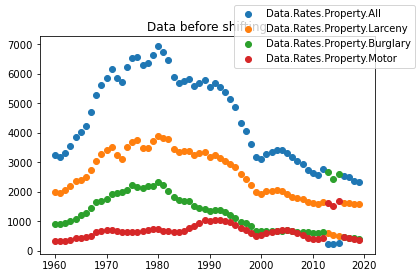

In [482]:
#sns.scatterplot(data=california, x = 'Year', y = 'Data.Population', hue = 'State')
fig,ax = plt.subplots()

# ax.scatter(data=california, x = 'Year', y = 'Data.Population')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Murder')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
# ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Rape')
fig.legend()
plt.title("Data before shifting")

For the data that we plan to use there is a visible replacement in variables between the columns. After verifying data in csv with the FBI data, the result was that our hipotesis was correct - data was shifted, so we decided to shift the data between above columns.

In [483]:
for i in range(0, len(df)):
    if df['Data.Rates.Property.All'][i] <  df['Data.Rates.Property.Burglary'][i]:
        x = df['Data.Rates.Property.All'][i]
        df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] = x
    if df['Data.Rates.Property.Larceny'][i] <  df['Data.Rates.Property.Motor'][i]:
        y = df['Data.Rates.Property.Larceny'][i]
        df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = y
    if df['Data.Rates.Property.Burglary'][i] <  df['Data.Rates.Property.Motor'][i]:
        z = df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = z

# for j in range(0, len(df)):       
#     if df['Data.Rates.Property.Larceny'][j] <  df['Data.Rates.Property.Motor'][j]:
#         y = df['Data.Rates.Property.Larceny'][j]
#         df['Data.Rates.Property.Larceny'][j] =  df['Data.Rates.Property.Motor'][j]
#         df['Data.Rates.Property.Motor'][j] = y 

C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_9816\2898082888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_9816\2898082888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Burglary'][i] = x
C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_9816\2898082888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

Text(0.5, 1.0, 'Data after shifting')

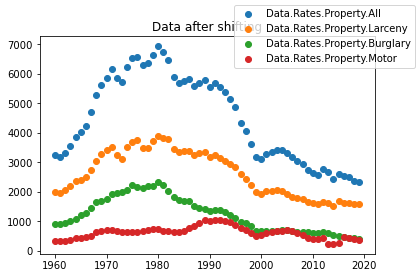

In [484]:
california = df[df["State"] == "California"]
fig,ax = plt.subplots()

# ax.scatter(data=california, x = 'Year', y = 'Data.Population')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Murder')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
# ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Rape')
fig.legend()
plt.title("Data after shifting")

In [485]:
california.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
240,California,1960,15717204,3235.4,910.5,1984.8,340.1,239.0,119.6,3.9,...,97.3,508511,143102,311956,53453,37558,18796,616,2859,15287
241,California,1961,16397000,3177.5,894.2,1950.6,332.7,232.7,120.0,3.7,...,90.5,521008,146615,319834,54559,38154,19684,605,3033,14832
242,California,1962,16970000,3326.2,934.1,2052.9,339.2,234.8,121.7,3.9,...,91.9,564451,158523,348373,57555,39846,20645,657,2946,15598
243,California,1963,17590000,3545.8,998.9,2184.7,362.2,241.2,126.3,3.8,...,93.6,623709,175703,384289,63717,42419,22208,673,3080,16458
244,California,1964,18084000,3874.3,1088.7,2366.5,419.1,265.6,138.2,4.1,...,103.2,700630,196883,427960,75787,48026,24998,740,3621,18667


# Basic analysis of the data

Text(0, 0.5, 'Population')

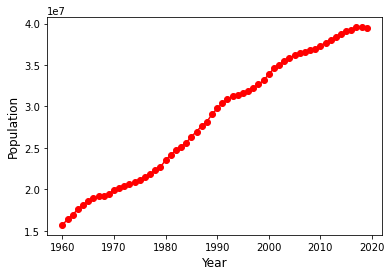

In [486]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(california['Year'], california['Data.Population'], color="red", marker = 'o')
# set x-axis label
ax.set_xlabel("Year",fontsize=12)
# set y-axis label
ax.set_ylabel("Population",fontsize=12)

In [487]:
california.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,1989.500000,2.855579e+07,4475.756667,1228.918333,2620.975000,616.905000,617.291667,339.663333,7.89000,34.218333,224.545000,1.163731e+06,3.580828e+05,691070.750000,201472.483333,178274.266667,99361.366667,2207.50000,9654.166667,62802.366667
std,17.464249,7.628299e+06,1478.502570,594.524257,778.947315,207.456626,242.850555,152.225295,3.11365,10.450099,104.734474,4.012412e+05,1.865597e+05,203269.217232,119409.517507,79088.695892,51175.017672,870.82368,3161.458981,30578.344402
min,1960.000000,1.571720e+07,2331.200000,386.100000,1527.400000,232.300000,232.700000,119.600000,3.70000,17.400000,19.500000,8.902900e+04,1.431020e+05,197404.000000,53453.000000,37558.000000,18796.000000,605.00000,2859.000000,7464.000000
25%,1974.750000,2.111550e+07,3177.725000,674.300000,1922.125000,443.275000,440.800000,241.225000,4.87500,25.300000,147.475000,9.858202e+05,2.317542e+05,620181.750000,139242.500000,136046.000000,53445.500000,1744.25000,8280.000000,48528.250000
50%,1989.500000,2.941151e+07,4294.700000,1164.950000,2555.650000,635.600000,572.700000,319.050000,6.85000,34.150000,198.450000,1.185550e+06,3.209860e+05,695103.000000,168435.500000,180857.000000,99075.500000,2188.50000,9872.500000,62310.000000
75%,2004.250000,3.592007e+07,5760.975000,1708.150000,3346.200000,696.875000,801.500000,410.650000,10.60000,41.650000,311.450000,1.492620e+06,4.356690e+05,859776.750000,241611.000000,210350.250000,136183.250000,2772.25000,11997.750000,84399.500000
max,2019.000000,3.955704e+07,6939.500000,2316.500000,3880.000000,1038.900000,1119.700000,641.600000,14.50000,58.200000,424.100000,1.726391e+06,1.024914e+06,986120.000000,656517.000000,345624.000000,198045.000000,4096.00000,15505.000000,130897.000000


In [488]:
mean_all = round(california['Data.Rates.Property.Larceny'].mean())
print(mean_all)
std_all = round(california['Data.Rates.Property.Larceny'].std())
print(std_all)

2621
779


In [489]:
# print(california["Data.Rates.Property.All"])
len(california)

60

# Prior predictive check

In [490]:
# normal_model1 = CmdStanModel(stan_file = 'normal_ppc.stan')
# stan_data={"data_mu": mean_all, "data_sigma": std_all}

normal_model1 = CmdStanModel(stan_file = 'prior_test.stan')
stan_data={'N': len(california["Data.Rates.Property.All"]), "dane": california["Data.Rates.Property.All"], 'std': std_all, "mean": mean_all}

R = 60 #bc the data has been collected for 60 years
sim = normal_model1.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
alpha_sim = sim.stan_variable('alpha')
beta_sim = sim.stan_variable('beta')
# mu_sim = sim.stan_variable('mu')
sigma_sim = sim.stan_variable('sigma')
prior = sim.stan_variable('prior')

INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\drive\prior_test.stan to exe file C:\Users\Agnieszka\Desktop\drive\prior_test.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\drive\prior_test.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Agnieszka/Desktop/drive/prior_test.hpp C:/Users/Agnieszka/Desktop/drive/prior_test.stan
Warning in 'C:/Users/Agnieszka/Desktop/drive/prior_test.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Agnieszka/Desktop/drive/prior_test.stan', line 12, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed auto


INFO:cmdstanpy:CmdStan done processing.


In [491]:
# print((alpha_sim))
# print(beta_sim)
# print(len(sigma_sim))
# print(len(prior))
# print(prior)
prior = prior[:,1].flatten()
print(prior)

[1363.97   1306.08   1322.13   3112.6    1481.45   1388.78   2406.99
  583.392  3408.23   1697.9    2701.77   2049.93   2823.79   1758.4
 2051.79   1814.08   2646.91   1940.15   1535.11   2428.17    624.934
 2231.14   2459.7    1680.86   2127.26   1826.16   1260.08   1267.75
 2115.99   1808.15    -68.4328 2030.88   1522.06   2257.72    657.967
 1655.17   3567.82   3126.54   1679.59   2039.5    2580.18   1578.78
 3105.52    906.53   2797.63    558.235  2036.88   1018.73   2674.53
  941.653  1872.87   1445.25    600.943  1421.68   1829.31   2297.92
  818.304  1477.83   2220.53   1185.83  ]


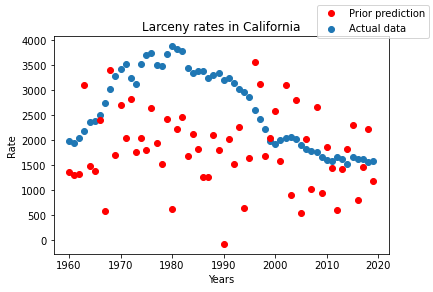

In [492]:
fig,ax = plt.subplots()
x= list(range(1960,2020))
plt.plot(x, prior, "o", color = 'red', label = 'Prior prediction')
ax.scatter(x = california['Year'], y = california["Data.Rates.Property.Larceny"], label = 'Actual data')
#ax.scatter(data=prior, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.set_ylabel("Rate")
ax.set_xlabel("Years")
ax.set_title("Larceny rates in California")
fig.legend()

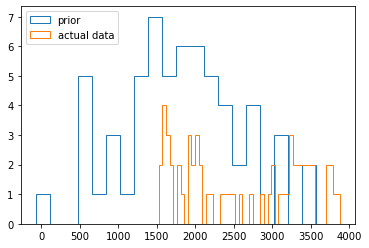

In [493]:
# prior.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
# np.histogram(prior, bins = 20)
plt.hist(prior, bins=20, label= "prior", histtype='step')
plt.hist(california['Data.Rates.Property.Larceny'], bins=50, label= "actual data", histtype='step')
plt.legend(loc="upper left")
plt.show()

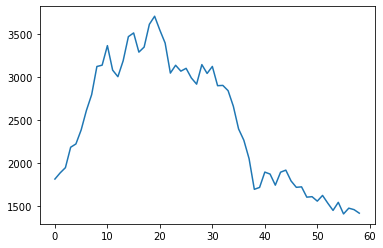

In [494]:
q50 =[]

for i in range(1,len(sim.stan_variable('prior')[1])):
    q50.append(np.quantile(sim.stan_variable('prior')[:,i],0.50))

plt.plot(q50)
plt.show()

In [495]:
normal_model1 = CmdStanModel(stan_file = 'normal_ppc.stan')
stan_data={"data_mu": mean_all, "data_sigma": std_all}

# normal_model1 = CmdStanModel(stan_file = 'prior_test.stan')
# stan_data={'N': len(california["Data.Rates.Property.All"]), "dane": california["Data.Rates.Property.All"], 'std': std_all, "mean": mean_all}

R = 60 #bc the data has been collected for 60 years
sim = normal_model1.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
# alpha_sim = sim.stan_variable('alpha')
# beta_sim = sim.stan_variable('beta')
mu_sim = sim.stan_variable('mu')
sigma_sim = sim.stan_variable('sigma')
prior = sim.stan_variable('prior')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                   


INFO:cmdstanpy:CmdStan done processing.


[3868.73  3010.49  1792.51  1991.09  3252.68  1521.41  3096.61  3415.28
 3230.39  1319.64  3856.34  4164.6   4581.64  2738.35  3443.76  2089.54
 2638.45  3276.    1378.92  1581.09  1629.67  2292.52  1738.82  3006.18
 3410.35  1721.08  4368.97  2617.36  3217.85  1951.09   560.375 4234.57
 3794.67  2841.35  4747.02  3110.37  2670.35  2759.1   2446.37  2944.18
 2708.79  2158.7   2199.04  3258.49  3370.29  2093.7   3264.31  3461.83
 3265.27  1978.09  2924.83  3196.63  1503.88  2163.38  2538.02  3483.89
 -142.576 3561.48  4580.97  2472.9  ]


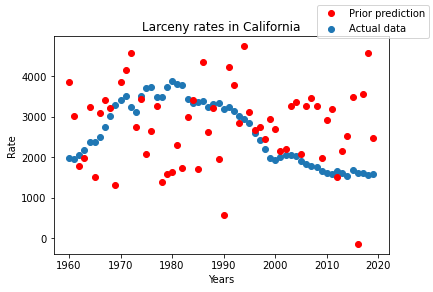

In [496]:
print(prior)
fig,ax = plt.subplots()
x= list(range(1960,2020))
plt.plot(x, prior, "o", color = 'red', label = 'Prior prediction')
ax.scatter(x = california['Year'], y = california["Data.Rates.Property.Larceny"], label = 'Actual data')
#ax.scatter(data=prior, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.set_ylabel("Rate")
ax.set_xlabel("Years")
ax.set_title("Larceny rates in California")
fig.legend()

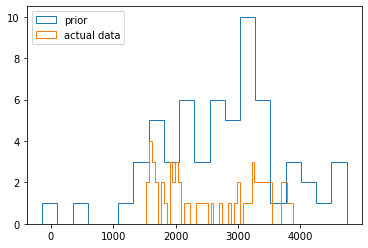

In [497]:
# prior.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
# np.histogram(prior, bins = 20)
plt.hist(prior, bins=20, label= "prior", histtype='step')
plt.hist(california['Data.Rates.Property.Larceny'], bins=50, label= "actual data", histtype='step')
plt.legend(loc="upper left")
plt.show()

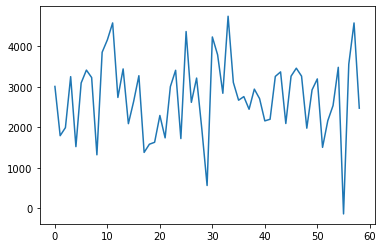

In [498]:
q50 =[]

for i in range(1,len(sim.stan_variable('prior'))):
    q50.append(np.quantile(sim.stan_variable('prior')[i],0.50))

plt.plot(q50)
plt.show()